<h1>Math</h1>

KNN (K-nearest-neighbour) is a very simple and intuitive method for supervised machine learning

To know the label of a point , consider the labels of the k-nearest points(neighbours) , then choose the class with the highest number of votes

There are several option to break ties:

1) just take whatever argma(votes) give us

2) pick one at random

3) weight by distance to neighbours

K is a Hyperparameter , use cross-validation to choose

<h1>code</h1>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# we will use the KNN on the MNIST dataset
# https://www.kaggle.com/oddrationale/mnist-in-csv

def get_mnist(limit=None): 
    df = pd.read_csv('datasets/MNIST/train.csv')
    data = df.to_numpy()
    np.random.shuffle(data)
    X = data[:,1:]/255.0
    Y = data[:,0]
    # data is too large , so training would take too much time
    # of course to little data is not good and leads to overfitting
    if limit is not None:
        X,Y = X[:limit] , Y[:limit]
    return X,Y

In [3]:
class KNN(object):
    def __init__(self,k):
        self.k = k
        
    def fit(self,X,Y):
        # KNN is a lazy classifier
        # does nothing during training
        # all is done during prediction
        self.X = X
        self.Y = Y
        
        
    def predict(self,X):
        pred = np.zeros(len(X))
        L = len(set(self.Y)) # number of labels
        
        for i,x in enumerate(X): # now we will get a prediction for each point
            diff = self.X-x
            sq_dist = (diff*diff).sum(axis=1)
            # returns list of indicies , first k indicies are thos of least k distances
            idx = np.argpartition(sq_dist, self.k)[:self.k]
            nearest = [self.Y[i] for i in idx]
            # now we take votes
            votes = {}
            for y in nearest:
                votes[y] = votes.get(y,0)+1
            
            max_label = None
            max_votes = 0
            for label,votes in votes.items():
                if votes > max_votes:
                    max_label = label
                    max_votes = votes
            pred[i] = max_label
        return pred
            
    def score(self,X,Y):
        P = self.predict(X)
        return np.mean(P==Y)

In [4]:
X,Y = get_mnist(2000)
Ntrain = 1000
Xtrain,Ytrain = X[:Ntrain] , Y[:Ntrain]
Xtest , Ytest = X[Ntrain:] , Y[Ntrain:]

In [5]:
for k in [1,2,3,4,5]:
    model = KNN(k)
    print("k=",k)
    t0 = datetime.now()
    model.fit(Xtrain,Ytrain)
    print("Training time: ",datetime.now()-t0)
    
    t0 = datetime.now()
    print("Training accuracy: ",model.score(Xtrain,Ytrain))
    print("Time to compute train accuracy: ",(datetime.now()-t0),"Train size:",len(Ytrain))
    
    t0 = datetime.now()
    print("Test accuracy: ",model.score(Xtest,Ytest))
    print("Time to compute test accuracy: ",(datetime.now()-t0),"Test size:",len(Ytest))
    print('--------------------------------')

k= 1
Training time:  0:00:00
Training accuracy:  1.0
Time to compute train accuracy:  0:00:06.911600 Train size: 1000
Test accuracy:  0.898
Time to compute test accuracy:  0:00:06.577412 Test size: 1000
--------------------------------
k= 2
Training time:  0:00:00
Training accuracy:  1.0
Time to compute train accuracy:  0:00:06.270234 Train size: 1000
Test accuracy:  0.898
Time to compute test accuracy:  0:00:06.271233 Test size: 1000
--------------------------------
k= 3
Training time:  0:00:00
Training accuracy:  0.958
Time to compute train accuracy:  0:00:06.232335 Train size: 1000
Test accuracy:  0.887
Time to compute test accuracy:  0:00:06.403877 Test size: 1000
--------------------------------
k= 4
Training time:  0:00:00
Training accuracy:  0.944
Time to compute train accuracy:  0:00:06.539516 Train size: 1000
Test accuracy:  0.887
Time to compute test accuracy:  0:00:06.663197 Test size: 1000
--------------------------------
k= 5
Training time:  0:00:00
Training accuracy:  0.9

<h1>Math</h1>

Now we want to consider a scenario where KNN fails , this would help us understand its weaknesses

One scenario is a grid of alternating dots

The majority of the neighbours will always be from the opposing class

we should expect to yeild a train accuracy of 0

<h1>code</h1>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# first we create a grid of alternating dots

width = 8
height = 8
N = width * height
X = np.zeros((N,2))
Y = np.zeros(N)
n = 0
t = 0
start_t = 0
for i in range(width):
    t = start_t 
    for j in range(height):
        X[n] = [i,j]
        Y[n] = t
        n += 1
        t = (t+1) % 2 # alternate between 0 and 1
    start_t = (start_t+1) %2

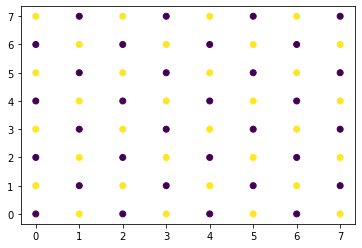

In [8]:
# lets plot the data
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [9]:
model = KNN(3)
model.fit(X,Y)
print('train accuracy: ',model.score(X,Y))

train accuracy:  0.0


In [10]:
# as expected

<h1>code</h1>

In [11]:
def get_xor():
    # we will make the XOR grid like before
    N = 200
    X = np.random.random((N, 2))*2 - 1
    # generate labels
    T = np.zeros(N)
    T[(X[:,0] < 0) & (X[:,1] > 0)] = 1
    T[(X[:,0] > 0) & (X[:,1] < 0)] = 1
    return X,T
    

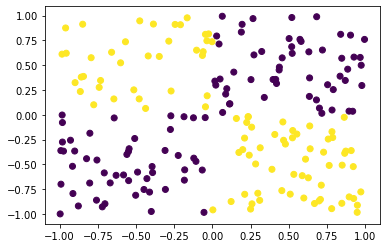

In [12]:
X,Y = get_xor()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [13]:
model = KNN(3)
model.fit(X,Y)
print("Train accuracy: ",model.score(X,Y))

Train accuracy:  0.98


In [14]:
# This is not a linear problem ,that is we cannot draw a line to seperate the classes
# yet KNN get a very godd accuracy

<h1>code</h1>

In [15]:
# now again for the donut problem 
def get_donut():
    N = 200
    D = 2
    R_inner = 5
    R_outer = 10

    # in a polar system , this is the distance from origin
    # we sample from a uniform distribution , set mean to 0
    R1 = np.random.randn((N//2)) + R_inner
    # and this is the angle
    # 2pi * (number from 0-1) so we get thetas between 0-2*pi
    theta = 2*np.pi*np.random.random(N//2)
    # in a cartesian system x component is R cos theta , y component is R sin theta
    X_inner = np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

    R2 = np.random.randn((N//2)) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T

    X = np.concatenate([X_inner , X_outer])
    T = np.array([0]*(N//2) + [1]*(N//2))
    
    return X,T

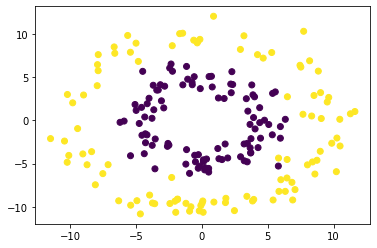

In [16]:
X,Y = get_donut()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [17]:
model = KNN(3)
model.fit(X,Y)
print("Train accuracy: ",model.score(X,Y))

Train accuracy:  0.985


In [18]:
# once again a very good accuracy on a non-linear problem

<h1>Math</h1>

More thoughts on choice of k

we say that a small value of k is expressive , if k = 1 , then we get a perfect training accuracy , but we dont necessarily capture the trend in the data , and so we overfit , since model is too complex

large k is simpler and may capture the general trend , but simple may also end up underfitting